In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
daily = pd.read_csv("../data/raw/features_daily.csv", index_col=0, parse_dates=True)
weekly = pd.read_csv("../data/raw/features_weekly.csv", index_col=0, parse_dates=True)


In [3]:
kmeans_daily = KMeans(n_clusters=4, random_state=42)
kmeans_weekly = KMeans(n_clusters=4, random_state=42)

daily["kmeans_regime"] = kmeans_daily.fit_predict(daily)
weekly["kmeans_regime"] = kmeans_weekly.fit_predict(weekly)


In [4]:
prices_daily = pd.read_csv(
    "../data/raw/sp500_daily.csv",
    index_col=0,
    parse_dates=True
)

prices_weekly = pd.read_csv(
    "../data/raw/sp500_weekly.csv",
    index_col=0,
    parse_dates=True
)


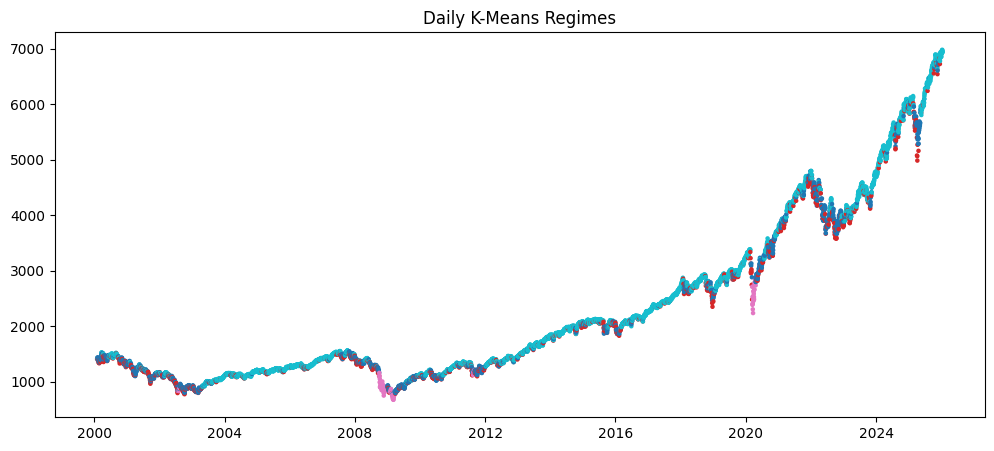

In [5]:
plt.figure(figsize=(12,5))
plt.scatter(
    prices_daily.loc[daily.index].index,
    prices_daily.loc[daily.index]["SP500_Close"],
    c=daily["kmeans_regime"],
    cmap="tab10",
    s=5
)
plt.title("Daily K-Means Regimes")
plt.show()


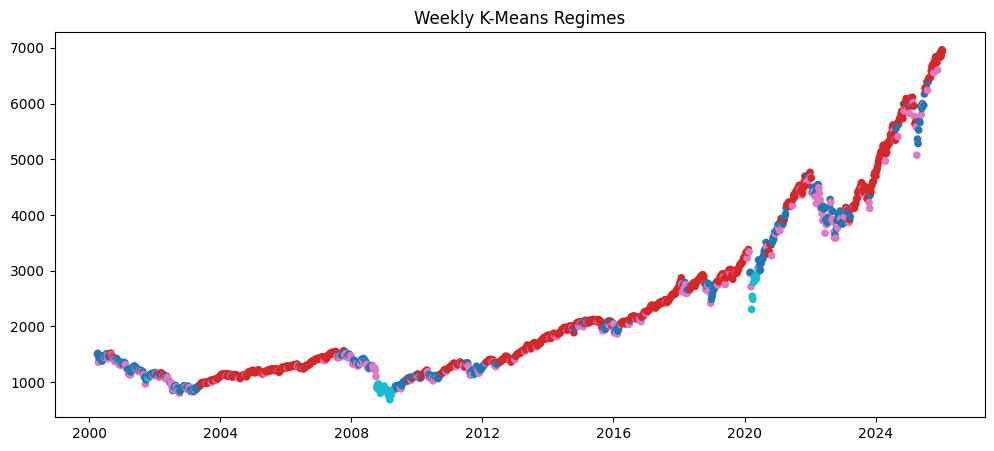

In [6]:
plt.figure(figsize=(12,5))
plt.scatter(
    prices_weekly.loc[weekly.index].index,
    prices_weekly.loc[weekly.index]["SP500_Close"],
    c=weekly["kmeans_regime"],
    cmap="tab10",
    s=20
)
plt.title("Weekly K-Means Regimes")
plt.show()


In [7]:
gmm_daily = GaussianMixture(n_components=4, random_state=42)
gmm_weekly = GaussianMixture(n_components=4, random_state=42)

daily["gmm_regime"] = gmm_daily.fit_predict(daily.drop(columns=["kmeans_regime"]))
weekly["gmm_regime"] = gmm_weekly.fit_predict(weekly.drop(columns=["kmeans_regime"]))


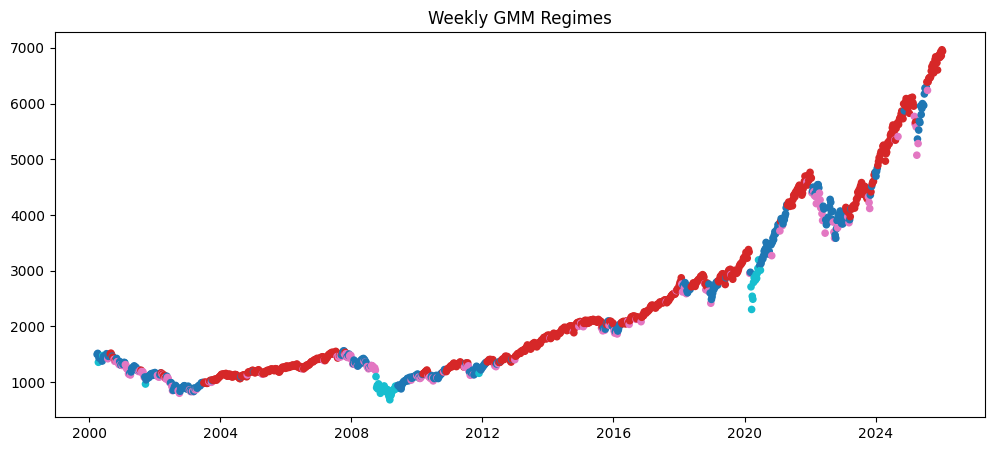

In [8]:
plt.figure(figsize=(12,5))
plt.scatter(
    prices_weekly.loc[weekly.index].index,
    prices_weekly.loc[weekly.index]["SP500_Close"],
    c=weekly["gmm_regime"],
    cmap="tab10",
    s=20
)
plt.title("Weekly GMM Regimes")
plt.show()


In [9]:
def count_switches(series):
    return (series != series.shift(1)).sum()

print("Daily K-Means switches:", count_switches(daily["kmeans_regime"]))
print("Weekly K-Means switches:", count_switches(weekly["kmeans_regime"]))


Daily K-Means switches: 2060
Weekly K-Means switches: 483
